# Experiment 1: Document at various level for short dataset(law:non-law)

## 1. Article level

In the file each article is seperated by 'NEW_ARTICLE'

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx
import mantel

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### law-texts-all.txt

In [2]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == 'NEW_ARTICLE':
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list_law,titles_law,word_count_law = load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 3


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>3]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text_law=preprocess_data(document_list_law)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley', 'court', 'appeal', '2000', '152hearing', 'dates', 'october', 'november', '19985', 'november', '1998catchwords', 'prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997', '29headnote', '1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 'being

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics_law = len(document_list_law)
words = word_count_law
model_law = create_gensim_lsa_model(clean_text_law,number_of_topics_law,words)
words_from_law = dict(model_law.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
top_words_law = dict(model_law.show_topic(0,topn=5)) 

In [10]:
top_words_law

{'tariff': 0.3329384971656331,
 'secretari': 0.33147720211273746,
 'prison': 0.24915911995674708,
 'life': 0.23611708519236543,
 'sentenc': 0.22952296370340286}

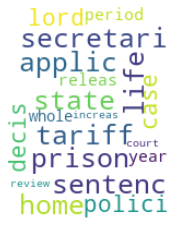

In [11]:
from wordcloud import WordCloud
text = dict(model_law.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph.png')

Cosine-similarity

In [12]:
a=pd.DataFrame()

for i in range(number_of_topics_law):
    words_from_law =dict(model_law.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()


df = pd.DataFrame(columns=list(top_words_law.keys()), 
                  index = list(top_words_law.keys()))

l = list(top_words_law.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled.png')

cosine-similarity
             tariff secretari    prison      life   sentenc
tariff            1  0.983798  0.752886  0.981629  0.574831
secretari  0.983798         1  0.684687  0.938672  0.427497
prison     0.752886  0.684687         1  0.853834  0.833889
life       0.981629  0.938672  0.853834         1  0.712817
sentenc    0.574831  0.427497  0.833889  0.712817         1


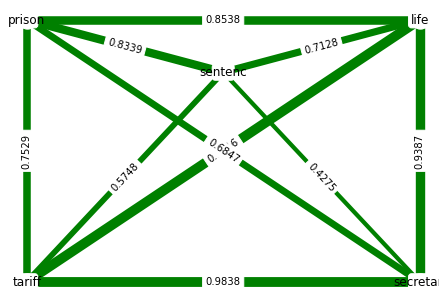

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words_law.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig.png')

### non-law-all.txt

In [14]:
document_list_nonlaw,titles_nonlaw,word_count_nonlaw = load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 4


In [15]:
clean_text_nonlaw=preprocess_data(document_list_nonlaw)

['hardest', 'case', 'myra', 'hindley', 'life', 'sentences', 'rule', 'lawmyra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction', 'twomurders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known', 'asthe', 'moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousnessof', 'society', 'exaggeration', 'that', 'hindley', 'popularlyconsidered', 'embodiment', 'evil', 'over', 'last', 'years', 'hasmounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine', 'thelength', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hardcase', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom', 'thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'positionof', 'home', 'secretary', 'hardened', 'main', 'because', 'politicalimpact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'becausehindley', 'mandatory', 'life', 'prisoner', 'case', 'profoundimpact', 'relating', 'such', 'prisoners', 'prevented', 'fromremain

In [16]:
# LSA Model
number_of_topics_nonlaw=len(document_list_nonlaw)
words=word_count_nonlaw
model_nonlaw=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics_nonlaw,words)
words_from_nonlaw =dict(model_nonlaw.show_topic(0, topn=words))#dict and encoding matrix values

In [17]:
top_words_nonlaw = dict(model_nonlaw.show_topic(0,topn=5))

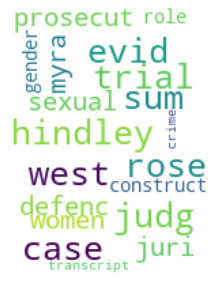

In [18]:
from wordcloud import WordCloud
text = dict(model_nonlaw.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph1.png')

cosine similarity

In [19]:
a=pd.DataFrame()

for i in range(number_of_topics_nonlaw):
    words_from_nonlaw =dict(model_nonlaw.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_nonlaw,index=[i])
    a=a.append(b)

a=a.transpose()


df = pd.DataFrame(columns=list(top_words_nonlaw.keys()), 
                  index = list(top_words_nonlaw.keys()))

l = list(top_words_nonlaw.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled1.png')

cosine-similarity
           judg      evid      west     trial      case
judg          1  0.985121  0.513522  0.985122  0.594254
evid   0.985121         1  0.578296  0.985766  0.466265
west   0.513522  0.578296         1  0.652864  0.273676
trial  0.985122  0.985766  0.652864         1  0.572048
case   0.594254  0.466265  0.273676  0.572048         1


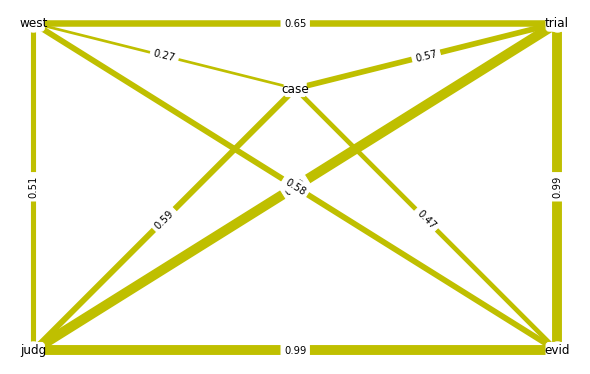

In [20]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words_nonlaw.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig1.png')

In [21]:
def mantel_test():
    words_law_article =dict(model_law.show_topic(0, topn=words))
    words_nonlaw_article =dict(model_nonlaw.show_topic(0, topn=words))

    top_words_law_article = dict(model_law.show_topic(0, topn=5)) 
    top_words_nonlaw_article = dict(model_nonlaw.show_topic(0,topn=5)) 


    c={} #law words in non law
    for key in top_words_law_article:
        try:
            c[key] = words_nonlaw_article[key]
        except KeyError:
            c[key] = 0

    top_words_nonlaw_article.update(c)

    b={} #non law words in law
    for key in top_words_nonlaw_article:
        try:
            b[key] = words_law_article[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_law_article)
    top_words_law_article=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics_law):
        words_from_law =dict(model_law.show_topic(i, topn=words))
        b=pd.DataFrame(words_from_law,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_law_article.keys()), 
                      index = list(top_words_law_article.keys()))

    l = list(top_words_law_article.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.empty((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)

    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics_nonlaw):
        words_from_nonlaw =dict(model_nonlaw.show_topic(i, topn=words))
        b=pd.DataFrame(words_from_nonlaw,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_nonlaw_article.keys()), 
                      index = list(top_words_nonlaw_article.keys()))

    l = list(top_words_nonlaw_article.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.empty((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)

    df1 = df.to_numpy()

    dist1 = list(df1[np.triu_indices(len(top_words_law_article), k = 1)])

    df1 = df.to_numpy()

    dist2 = list(df1[np.triu_indices(len(top_words_law_article), k = 1)])

    return mantel.test(dist1, dist2, perms=1000, method='pearson', tail='upper')

In [22]:
mantel_test()

Pairwise-distance
                judg         evid       west      trial      case     tariff  \
judg               0     0.121699   0.100146  0.0500752  0.175308   0.318453   
evid        0.121699  6.58545e-10  0.0373203  0.0783724  0.167005   0.347887   
west        0.100146    0.0373203          0    0.05688  0.188194    0.35091   
trial      0.0500752    0.0783724    0.05688          0   0.17354   0.344125   
case        0.175308     0.167005   0.188194    0.17354         0   0.274348   
tariff      0.318453     0.347887    0.35091   0.344125  0.274348          0   
secretari   0.335114     0.343847   0.353323    0.35309  0.261752  0.0637207   
prison      0.197192     0.283988   0.279861   0.237803  0.188891   0.232028   
life        0.199034     0.247044   0.244737   0.229089  0.191199   0.120939   
sentenc     0.278879     0.395116   0.372313   0.328575  0.372052   0.332822   

           secretari    prison      life      sentenc  
judg        0.335114  0.197192  0.199034     

(1.0, 0.001, 6.983268944268187)

## 2. 2-3 paragraphs

### law-texts-all.txt

In [23]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [24]:
document_list_law,titles_law,word_count_law = load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 2


In [25]:
clean_text_law=preprocess_data(document_list_law)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley', 'court', 'appeal', '2000', 'hearing', 'dates', 'october', 'november', '1998', 'november', '1998', 'catchwords', 'prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997', 'headnote', '1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 'being',

In [26]:
# LSA Model
number_of_topics=len(document_list_law)
words=word_count_law
model_law=create_gensim_lsa_model(clean_text_law,number_of_topics,words)
words_from_law =dict(model_law.show_topic(0, topn=words))##dict and encoding matrix values

In [27]:
top_words_law = dict(model_law.show_topic(0, topn=5))

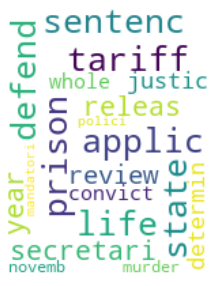

In [28]:
from wordcloud import WordCloud
text = dict(model_law.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph2.png')

In [29]:
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model_law.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_law.keys()), 
                  index = list(top_words_law.keys()))

l = list(top_words_law.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled2.png')

cosine-similarity
           tariff     prison       life      would   sentenc
tariff          1   0.977417   0.977417   0.261261  0.987197
prison   0.977417          1          1  0.0513785   0.99861
life     0.977417          1          1  0.0513785   0.99861
would    0.261261  0.0513785  0.0513785          1  0.103953
sentenc  0.987197    0.99861    0.99861   0.103953         1


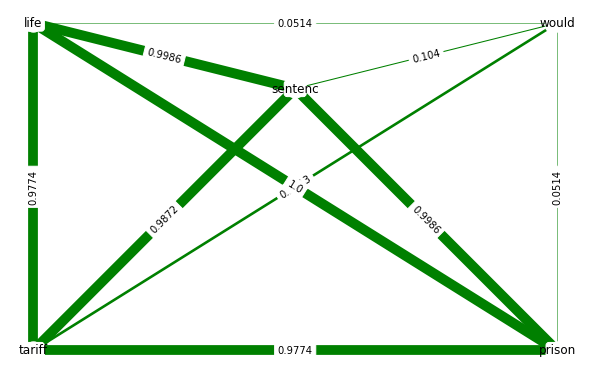

In [30]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words_law.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig2.png')

### non-law-all.txt

In [31]:
document_list_nonlaw,titles_non_law,word_count_nonlaw=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 2


In [32]:
clean_text_nonlaw=preprocess_data(document_list_nonlaw)

['hardest', 'case', 'myra', 'hindley', 'life', 'sentences', 'rule', 'myra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction', 'murders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known', 'moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousness', 'society', 'exaggeration', 'that', 'hindley', 'popularly', 'considered', 'embodiment', 'evil', 'over', 'last', 'years', 'mounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine', 'length', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hard', 'case', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom', 'thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'position', 'home', 'secretary', 'hardened', 'main', 'because', 'political', 'impact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'because', 'hindley', 'mandatory', 'life', 'prisoner', 'case', 'profound', 'impact', 'relating', 'such', 'prisoners', 'prevented', 'from', 'remaini

In [33]:
# LSA Model
number_of_topics=len(document_list_nonlaw)
words=word_count_nonlaw
model_nonlaw=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics,words)
words_from_law =dict(model_nonlaw.show_topic(0, topn=words))##dict and encoding matrix values

In [34]:
top_words_nonlaw = dict(model_nonlaw.show_topic(0, topn=5))

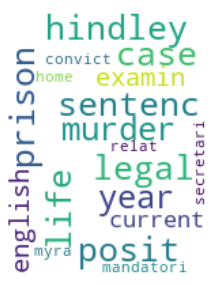

In [35]:
from wordcloud import WordCloud
text = dict(model_nonlaw.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph3.png')

In [36]:
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model_nonlaw.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_non_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_nonlaw.keys()), 
                  index = list(top_words_nonlaw.keys()))

l = list(top_words_nonlaw.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled3.png')

cosine-similarity
             life    prison    sentenc    hindley     posit
life            1  0.884398   0.939851    0.32706  0.983158
prison   0.884398         1   0.671774   0.730316  0.954802
sentenc  0.939851  0.671774          1 -0.0154102  0.861596
hindley   0.32706  0.730316 -0.0154102          1  0.494258
posit    0.983158  0.954802   0.861596   0.494258         1


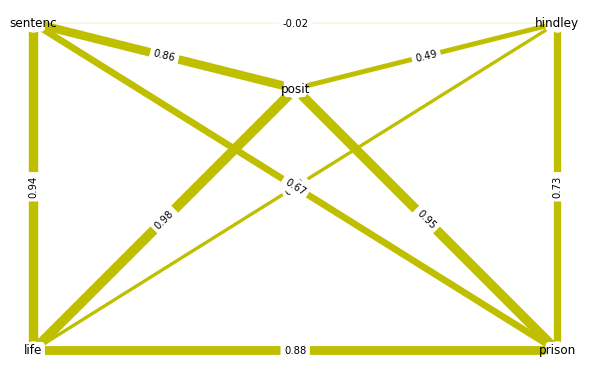

In [37]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words_nonlaw.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig3.png')

In [38]:
mantel_test()

Pairwise-distance
              life      prison      sentenc      hindley        posit  \
life             0           0    0.0862477      0.32587    0.0760228   
prison           0           0    0.0862477      0.32587    0.0760228   
sentenc  0.0862477   0.0862477            0     0.243335    0.0476128   
hindley    0.32587     0.32587     0.243335   1.6131e-09            0   
posit    0.0769168  0.00456744  1.49185e-05  1.61773e-10  2.02965e-20   
tariff   0.0868208   0.0868208    0.0994242     0.329301     0.083679   
would     0.566645    0.566645     0.498648     0.434104    0.0769168   

              tariff        would  
life       0.0868208     0.566645  
prison     0.0868208     0.566645  
sentenc    0.0994242     0.498648  
hindley     0.329301     0.434104  
posit    3.63936e-40  1.29804e-79  
tariff             0     0.497952  
would       0.497952            0  
Pairwise-distance
             life    prison   sentenc   hindley        posit tariff would
life            0

(1.0, 0.001, 3.0850505130052177)

### 3. Paragraph level

### law-text-all.txt

In [39]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [40]:
document_list_law,titles_law,word_count_law=load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 450


In [41]:
clean_text_law=preprocess_data(document_list_law)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley']
['court', 'appeal']
['2000']
['hearing', 'dates', 'october', 'november', '1998']
['november', '1998']
['catchwords']
['prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997']
['headnote']
['1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 

In [42]:
# LSA Model
number_of_topics=10
words=word_count_law
model_law=create_gensim_lsa_model(clean_text_law,number_of_topics,words)
words_from_law =dict(model_law.show_topic(0, topn=words))##dict and encoding matrix values

In [43]:
top_words_law = dict(model_law.show_topic(0, topn=5))

In [44]:
top_words_law

{'tariff': -0.3724237695730617,
 'secretari': -0.3256584529748812,
 'prison': -0.26232428296088117,
 'state': -0.24618931578061945,
 'life': -0.23430493793551027}

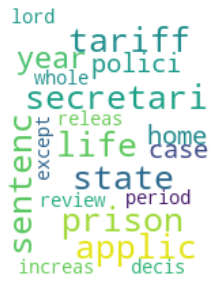

In [45]:
from wordcloud import WordCloud
text = dict(model_law.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph4.png')

In [46]:
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model_law.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_law.keys()), 
                  index = list(top_words_law.keys()))

l = list(top_words_law.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled4.png')

cosine-similarity
              tariff  secretari    prison      state       life
tariff             1  0.0159381  0.017235   0.065117   0.341954
secretari  0.0159381          1  0.068926   0.707767  0.0435675
prison      0.017235   0.068926         1  -0.129266   0.481129
state       0.065117   0.707767 -0.129266          1  0.0307354
life        0.341954  0.0435675  0.481129  0.0307354          1


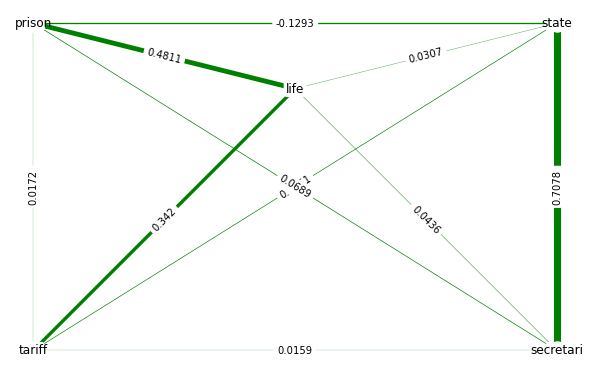

In [47]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words_law.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig4.png')

### non-law-all.txt

In [48]:
document_list_nonlaw,titles_nonlaw,word_count_nonlaw=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 3038


In [49]:
clean_text_nonlaw=preprocess_data(document_list_nonlaw)

['hardest', 'case']
['myra', 'hindley', 'life', 'sentences']
['rule']
['myra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction']
['murders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known']
['moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousness']
['society', 'exaggeration', 'that', 'hindley', 'popularly']
['considered', 'embodiment', 'evil', 'over', 'last', 'years']
['mounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine']
['length', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hard']
['case', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom']
['thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'position']
['home', 'secretary', 'hardened', 'main', 'because', 'political']
['impact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'because']
['hindley', 'mandatory', 'life', 'prisoner', 'case', 'profound']
['impact', 'relating', 'such', 'prisoners', 'prevented', '

In [50]:
# LSA Model
number_of_topics=10
words=word_count_nonlaw
model_nonlaw=create_gensim_lsa_model(clean_text_nonlaw,number_of_topics,words)
words_from_non_law =dict(model_nonlaw.show_topic(0, topn=words))#dict and encoding matrix values

In [51]:
top_words_nonlaw=dict(model_nonlaw.show_topic(0, topn=5))

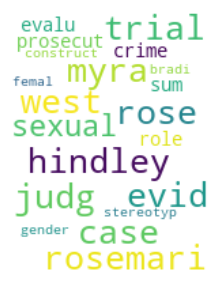

In [52]:
from wordcloud import WordCloud
text = dict(model_nonlaw.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph5.png')

In [53]:
a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model_nonlaw.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_non_law,index=[i])
    a=a.append(b)

a=a.transpose()

df = pd.DataFrame(columns=list(top_words_nonlaw.keys()), 
                  index = list(top_words_nonlaw.keys()))

l = list(top_words_nonlaw.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled5.png')

cosine-similarity
           hindley       myra        west        case      trial
hindley          1    0.98308  -0.0100487   0.0467776  0.0426439
myra       0.98308          1   0.0239536  -0.0299579 -0.0162671
west    -0.0100487  0.0239536           1  0.00645972 -0.0138079
case     0.0467776 -0.0299579  0.00645972           1 -0.0195542
trial    0.0426439 -0.0162671  -0.0138079  -0.0195542          1


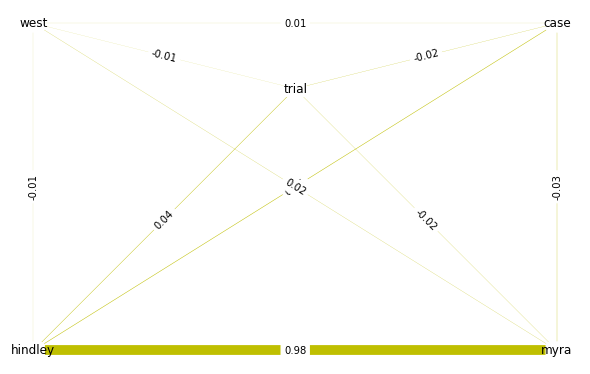

In [54]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words_nonlaw.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig5.png')

In [55]:
mantel_test()

Pairwise-distance
             hindley       myra         west      case      trial    tariff  \
hindley            0  0.0784428     0.129594  0.137217  0.0885284  0.636538   
myra       0.0784428          0    0.0513168    0.1801  0.0155272  0.579678   
west        0.129594  0.0513168  2.91038e-11  0.221436  0.0446605  0.549084   
case        0.137217     0.1801     0.221436         0   0.179291  0.602091   
trial      0.0885284  0.0155272    0.0446605  0.179291          0   0.56582   
tariff      0.636538   0.579678     0.549084  0.602091    0.56582         0   
secretari   0.526367   0.483672      0.46171   0.49986   0.468819   0.40035   
prison      0.331792   0.392704     0.436981  0.225189   0.393372  0.758515   
state       0.411257   0.354744     0.325491  0.391691   0.339419  0.265023   
life        0.241986   0.227102      0.23545  0.165278   0.215434  0.445059   

          secretari    prison     state      life  
hindley    0.526367  0.331792  0.411257  0.241986  
myra    

(1.0, 0.001, 3.7428856426432726)